In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip face-mask-dataset.zip

Archive:  face-mask-dataset.zip
replace data/with_mask/with_mask_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the depencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1354.jpg', 'with_mask_1801.jpg', 'with_mask_2772.jpg', 'with_mask_3478.jpg', 'with_mask_2438.jpg']
['with_mask_3003.jpg', 'with_mask_70.jpg', 'with_mask_3440.jpg', 'with_mask_295.jpg', 'with_mask_3205.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_534.jpg', 'without_mask_1050.jpg', 'without_mask_2709.jpg', 'without_mask_789.jpg', 'without_mask_460.jpg']
['without_mask_1643.jpg', 'without_mask_1366.jpg', 'without_mask_627.jpg', 'without_mask_2372.jpg', 'without_mask_464.jpg']


In [ ]:
print('Number of with mask images',len(with_mask_files))
print('Number of without mask images',len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


**Creating Labels for two classes of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

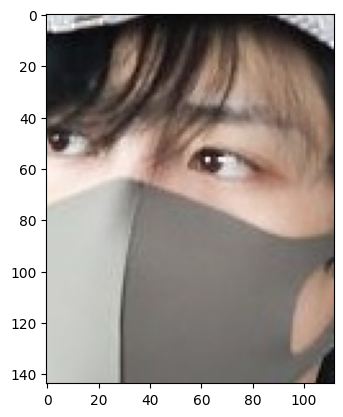

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_627.jpg')
imgplot = plt.imshow(img)
plt.show()

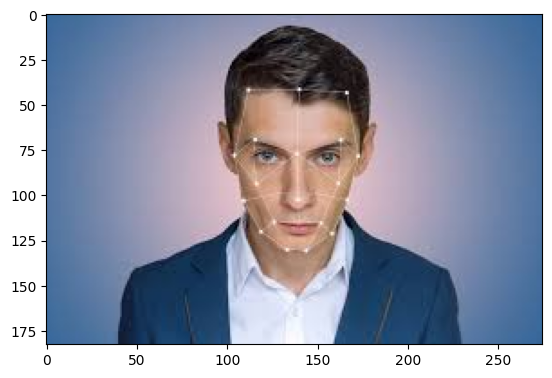

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2372.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images

2. Convert images to numpy arrays

In [ ]:
#convert image to numpy array

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'



for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)

7553

In [ ]:
type(data)

list

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

array([[[ 23,  32,  29],
        [ 24,  33,  30],
        [ 25,  34,  33],
        ...,
        [ 54,  94, 102],
        [ 48,  90,  97],
        [ 47,  90,  97]],

       [[ 24,  33,  30],
        [ 24,  33,  30],
        [ 25,  34,  33],
        ...,
        [ 56,  97, 103],
        [ 51,  94, 100],
        [ 49,  92,  98]],

       [[ 26,  35,  33],
        [ 26,  35,  33],
        [ 25,  34,  33],
        ...,
        [ 57,  99, 106],
        [ 54,  98, 101],
        [ 53,  97, 100]],

       ...,

       [[214, 228, 192],
        [210, 224, 188],
        [207, 221, 185],
        ...,
        [247, 250, 233],
        [249, 253, 236],
        [246, 250, 233]],

       [[214, 228, 192],
        [211, 225, 189],
        [209, 223, 187],
        ...,
        [247, 250, 233],
        [244, 248, 231],
        [239, 243, 226]],

       [[212, 228, 191],
        [211, 227, 190],
        [209, 223, 187],
        ...,
        [243, 247, 232],
        [239, 243, 226],
        [237, 241, 224]]], dtype=uint8)
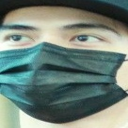

In [ ]:
data[0]

In [ ]:
#converting image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [ ]:
type(X)
type(y)

numpy.ndarray

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
y.shape

(7553,)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

**Train Test Split**

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
print(y.shape, y_train.shape,y_test.shape)

(7553,) (6042,) (1511,)


In [ ]:
y_train.shape

(6042,)

In [ ]:
# Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.19607843, 0.19215686, 0.17647059],
        [0.18431373, 0.18039216, 0.16470588],
        [0.17254902, 0.16862745, 0.15294118],
        ...,
        [0.79607843, 0.76862745, 0.69803922],
        [0.79215686, 0.76470588, 0.69411765],
        [0.78431373, 0.75686275, 0.68627451]],

       [[0.18823529, 0.18431373, 0.16862745],
        [0.18039216, 0.17647059, 0.16078431],
        [0.17647059, 0.17254902, 0.15686275],
        ...,
        [0.79607843, 0.76862745, 0.69803922],
        [0.78823529, 0.76078431, 0.69019608],
        [0.78039216, 0.75294118, 0.68235294]],

       [[0.20392157, 0.2       , 0.18431373],
        [0.20392157, 0.2       , 0.18431373],
        [0.19607843, 0.19215686, 0.17647059],
        ...,
        [0.77647059, 0.74901961, 0.67843137],
        [0.77254902, 0.74509804, 0.6745098 ],
        [0.78431373, 0.75686275, 0.68627451]],

       ...,

       [[0.97254902, 0.98039216, 0.96078431],
        [0.98039216, 0.98431373, 0.96862745],
        [0.98039216, 0

**Building a Convolution Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

In [ ]:
num_of_classes = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5 )

Epoch 1/5
170/170 [==============================] - 11s 23ms/step - loss: 0.4829 - accuracy: 0.7817 - val_loss: 0.2387 - val_accuracy: 0.9008
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.3058 - accuracy: 0.8764 - val_loss: 0.2213 - val_accuracy: 0.9107
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2524 - accuracy: 0.8972 - val_loss: 0.1843 - val_accuracy: 0.9273
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2152 - accuracy: 0.9141 - val_loss: 0.1843 - val_accuracy: 0.9322
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1780 - accuracy: 0.9251 - val_loss: 0.1684 - val_accuracy: 0.9388


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy = ',accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1765 - accuracy: 0.9312
Test Accuracy =  0.9311714172363281


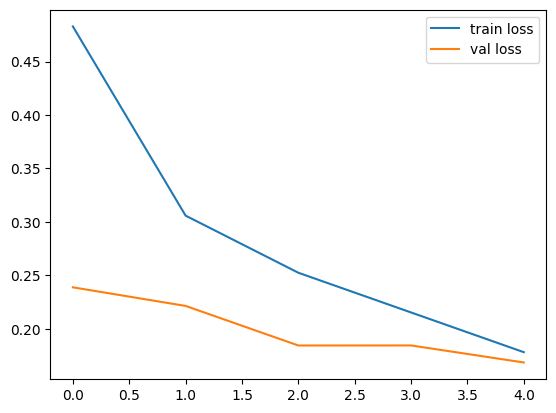

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='val loss')
plt.legend()
plt.show()

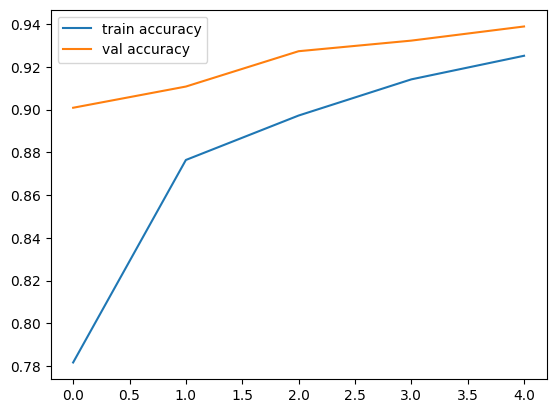

In [ ]:
#plot the accuracy
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

**Predicting system**

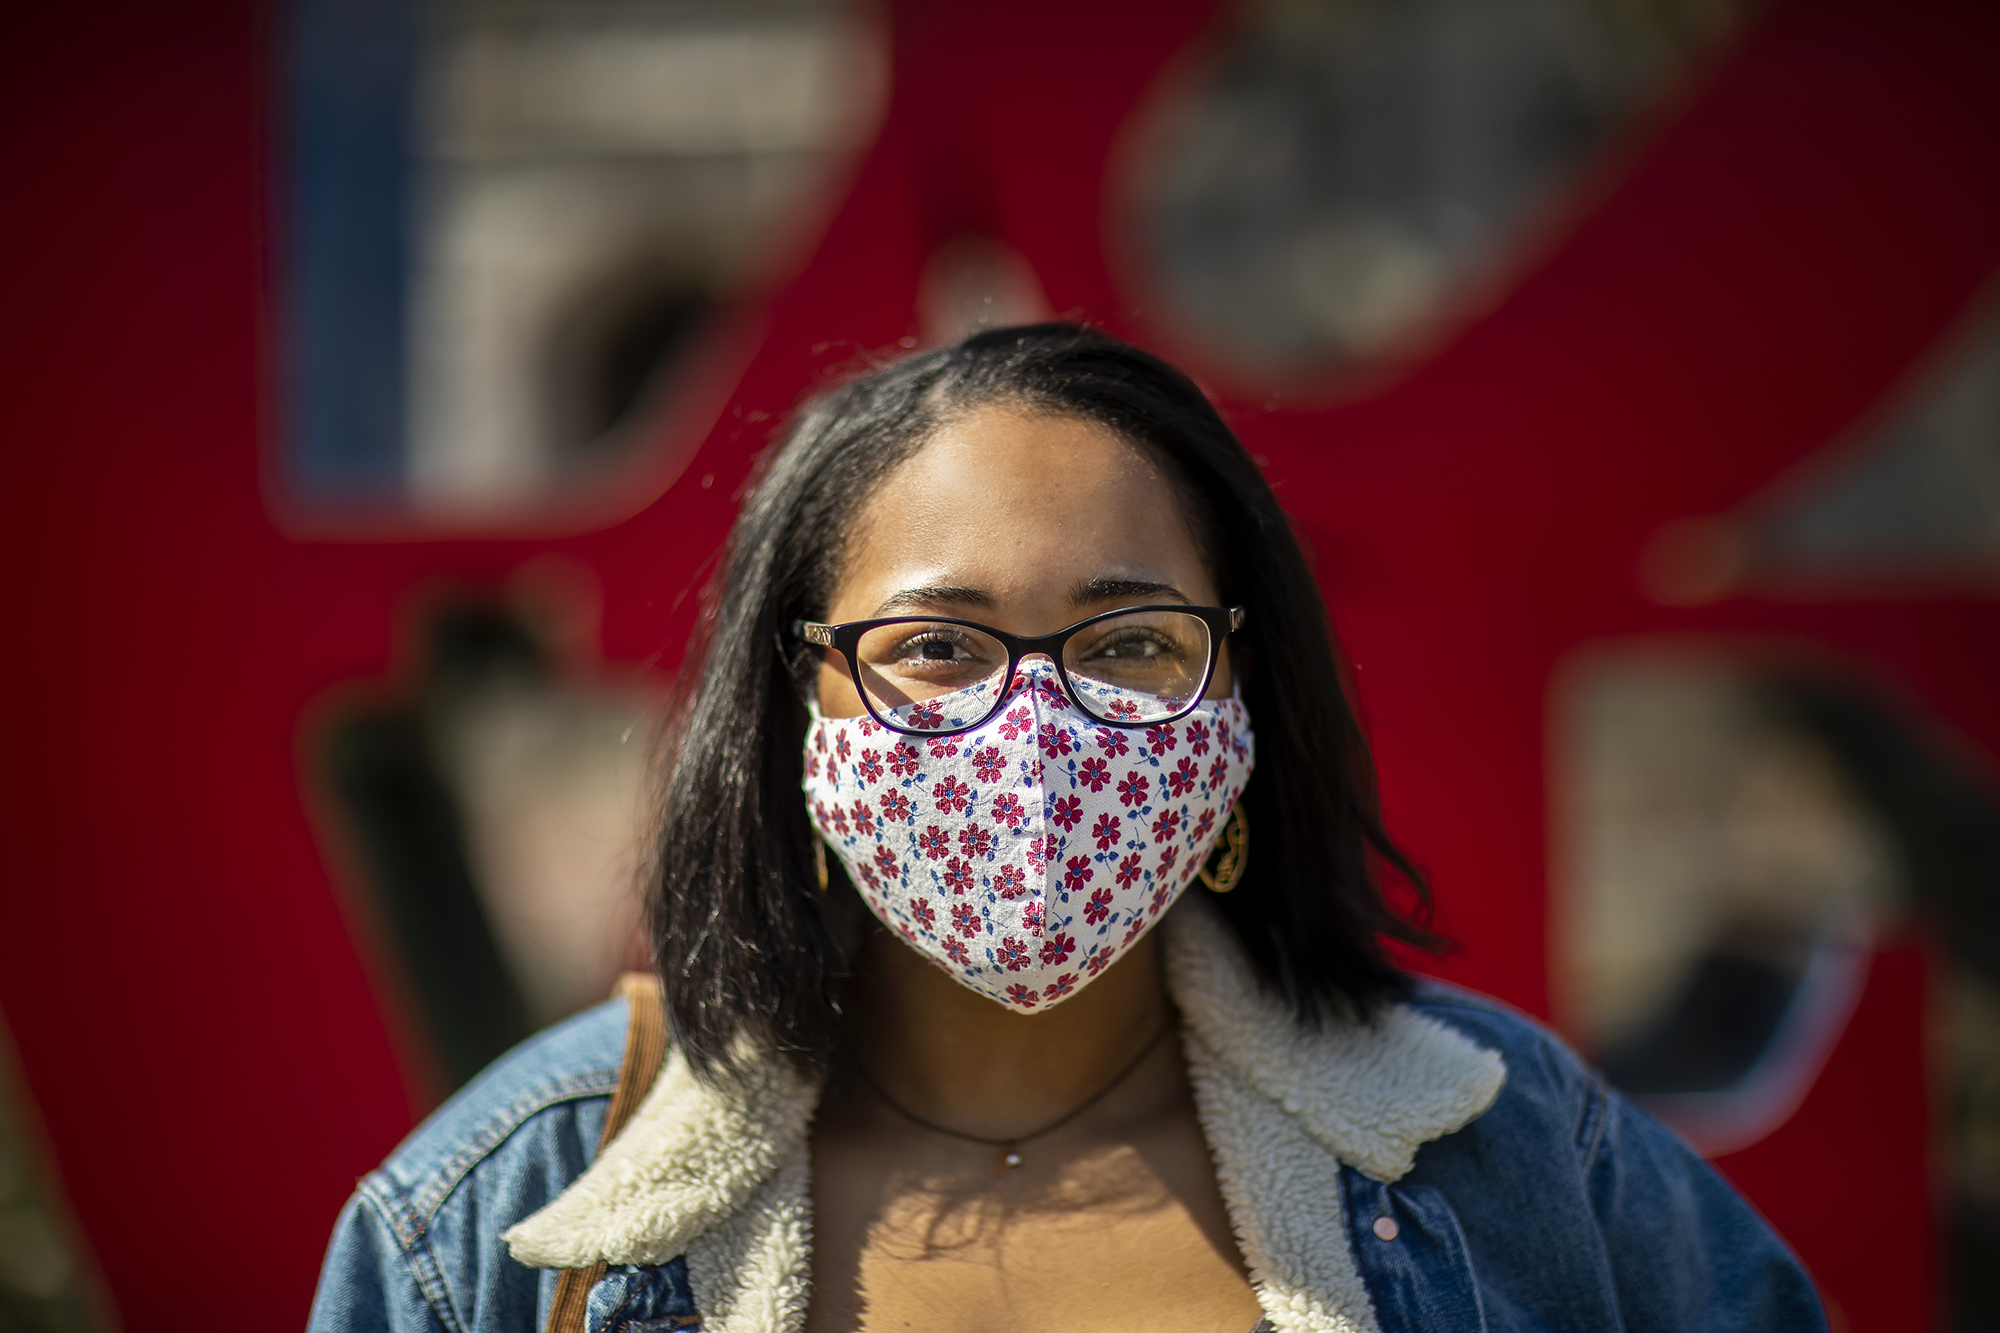

1/1 [==============================] - 0s 38ms/step
[[0.5075059  0.48049816]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

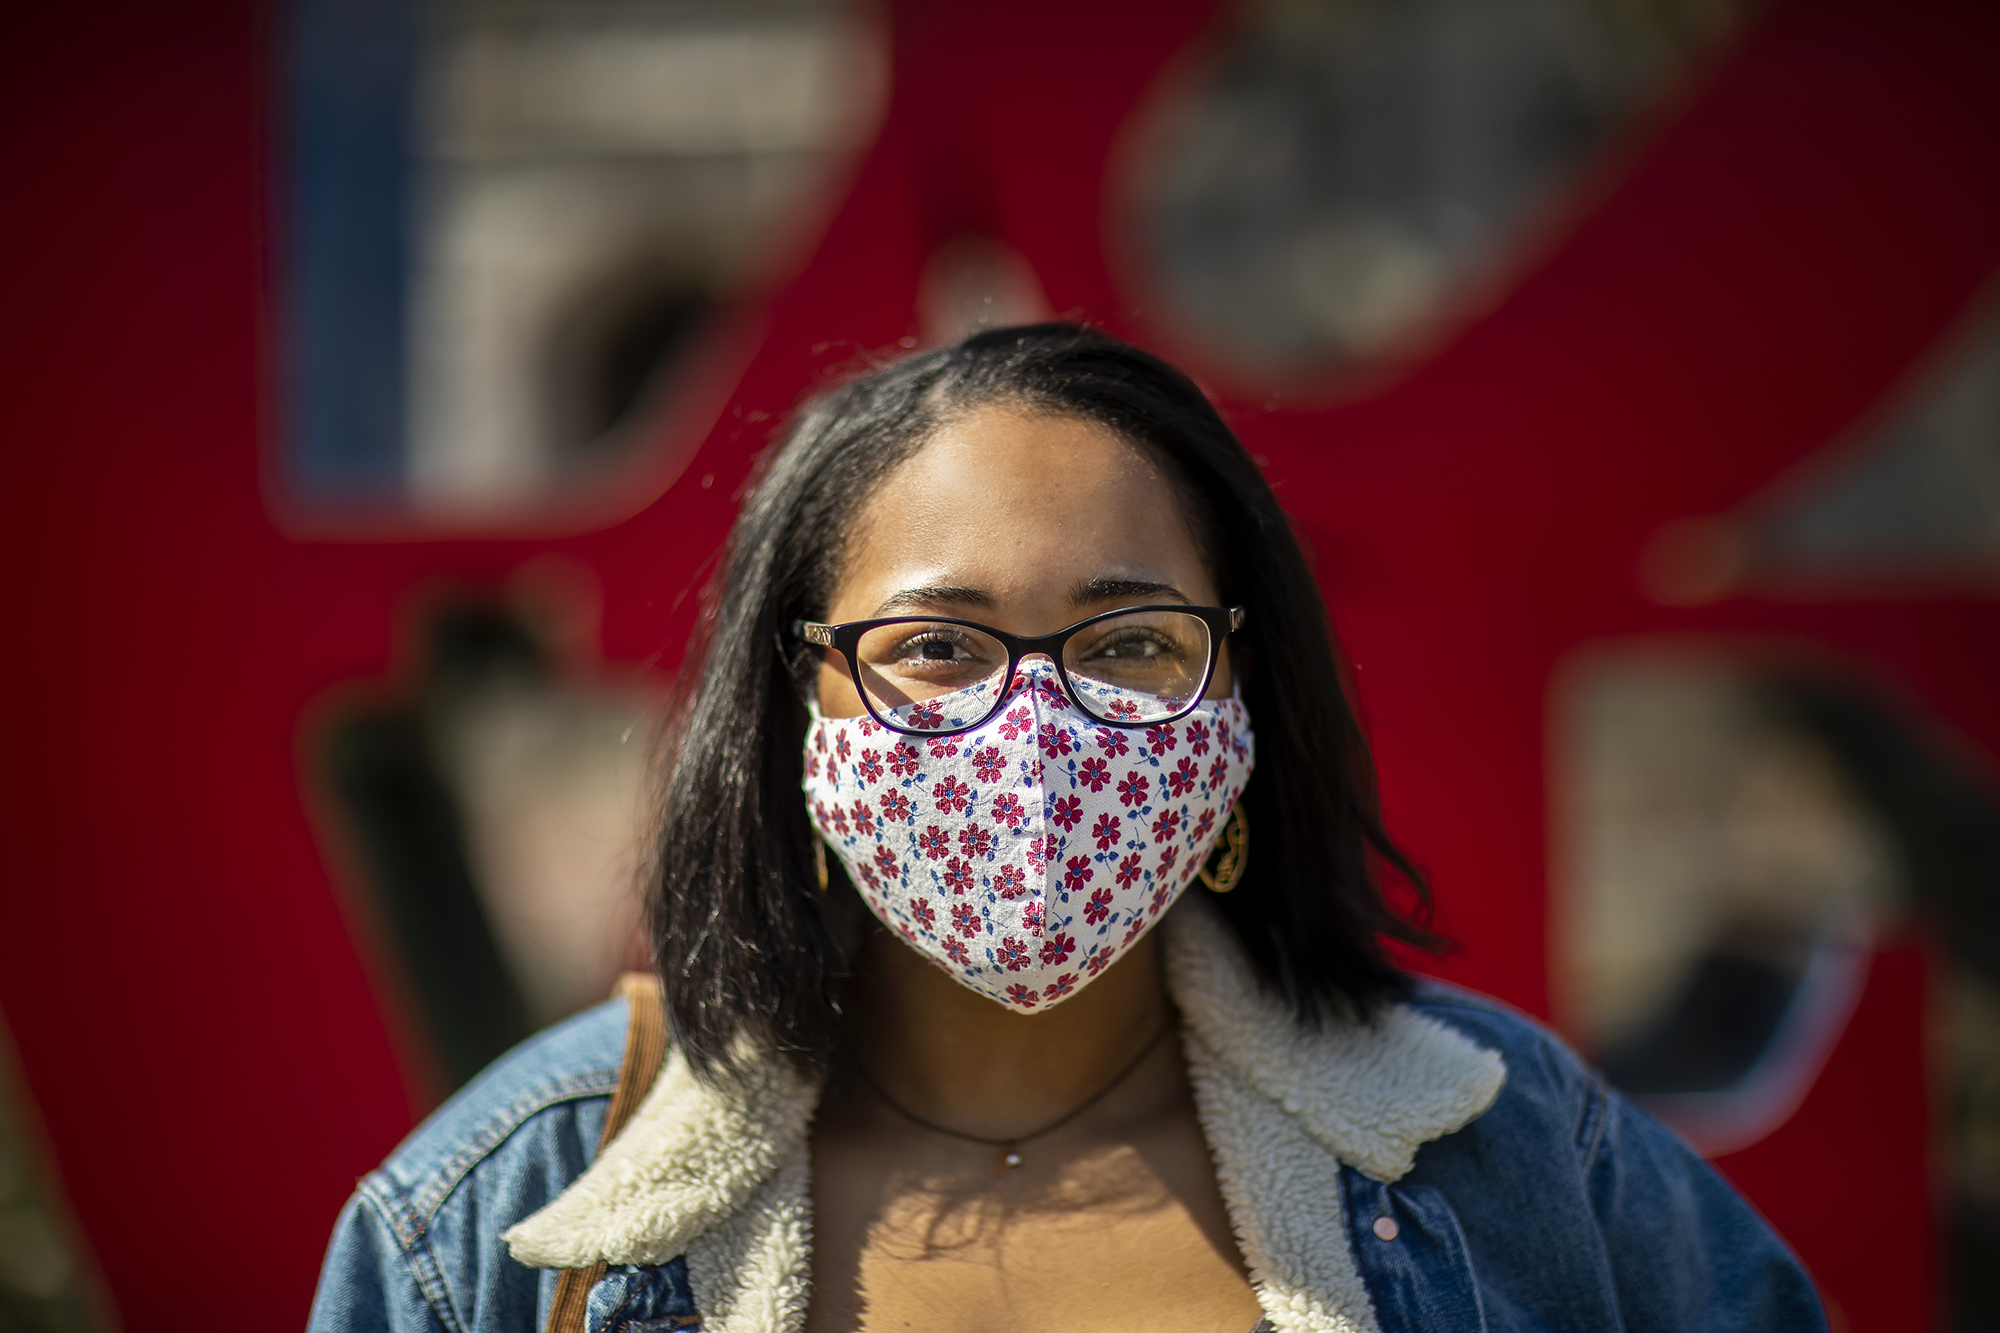

1/1 [==============================] - 0s 39ms/step
[[0.85416824]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

In [ ]:
model.save('face_mask_detector.h5')